In this section we do some basic descriptive statistics on our data, first on the CSV we had in input, then on some other dataframes retrieved from our relational database, in order to describe also data coming from JSON files.

In [2]:
from pandas import *
from sqlite3 import connect
from matplotlib import *

reading our sample CSV for the relational database

In [3]:
relational_publications = read_csv("data/relational_publications.csv")
relational_publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              347 non-null    object 
 5   volume             443 non-null    object 
 6   chapter            22 non-null     float64
 7   publication_venue  498 non-null    object 
 8   venue_type         498 non-null    object 
 9   publisher          498 non-null    object 
 10  event              0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


reading our sample CSV for the graph database

In [4]:
graph_publications = read_csv("data/graph_publications.csv")
graph_publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              303 non-null    object 
 5   volume             391 non-null    object 
 6   chapter            93 non-null     float64
 7   publication_venue  486 non-null    object 
 8   venue_type         486 non-null    object 
 9   publisher          486 non-null    object 
 10  event              0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


In [5]:
relational_publications.describe(include="all")

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,347,443,22.000000,498,498,498,0.0
unique,500,500,2,NaN,31,149,NaN,295,2,32,NaN
top,doi:10.1162/qss_a_00023,"Opencitations, An Infrastructure Organization ...",journal-article,NaN,1,11,NaN,Scientometrics,journal,crossref:297,NaN
freq,1,1,478,NaN,69,29,NaN,50,478,145,NaN
mean,NaN,NaN,NaN,2019.558000,NaN,NaN,0.909091,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.512353,NaN,NaN,0.294245,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2014.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [6]:
graph_publications.describe(include="all")

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,303,391,93.000000,486,486,486,0.0
unique,500,497,2,NaN,38,116,NaN,299,2,37,NaN
top,doi:10.1016/j.websem.2021.100655,Supply Chain Coordination Based On Web Service,journal-article,NaN,1,11,NaN,Applied Sciences,journal,crossref:297,NaN
freq,1,2,407,NaN,63,22,NaN,15,407,173,NaN
mean,NaN,NaN,NaN,2019.132000,NaN,NaN,0.849462,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.775636,NaN,NaN,0.359536,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2011.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2019.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


We notice that the same title appears twice in our dataset, let's check whether these two publications have other common features:

In [7]:
publication_same_title = graph_publications.query("title == 'Supply Chain Coordination Based On Web Service'")
publication_same_title

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
125,doi:10.4018/978-1-5225-7501-6.ch036,Supply Chain Coordination Based On Web Service,book-chapter,2019,NaN,NaN,0.0,NaN,NaN,NaN,NaN
136,doi:10.4018/978-1-5225-0956-1.ch009,Supply Chain Coordination Based On Web Service,book-chapter,2017,NaN,NaN,0.0,NaN,NaN,NaN,NaN


As we can see, the title is the same, but the years and the identifiers differ, so it looks like it might just be a coincidence. 
Let's create a dataframe that shows information about publication's authors, by querying our relational database with all our sample CSV and JSON uploaded. </br>
We could try to match this repeating title with an author and check whether they also differ.

We will use the same dataframe for other description later.

In [8]:
with connect("SoupGroup.db") as con:
    query = """SELECT PublicationsIds.id as id, publication_title, publication_year, venue_title, given_name || ' ' || family_name as author
                FROM PublicationsIds JOIN JournalArticles ON PublicationsIds.publication_id == JournalArticles.publication_id
                LEFT JOIN Journals ON JournalArticles.venue_id == Journals.venue_id
                LEFT JOIN PublicationsAuthors On JournalArticles.publication_id == PublicationsAuthors.publication_id
                LEFT JOIN Authors ON PublicationsAuthors.author_id == Authors.author_id
                UNION
                SELECT PublicationsIds.id as id, publication_title, publication_year, venue_title, given_name || ' ' || family_name as author
                FROM PublicationsIds JOIN BookChapters ON PublicationsIds.publication_id == BookChapters.publication_id
                LEFT JOIN Books ON BookChapters.venue_id == Books.venue_id
                LEFT JOIN PublicationsAuthors On BookChapters.publication_id == PublicationsAuthors.publication_id
                LEFT JOIN Authors ON PublicationsAuthors.author_id == Authors.author_id
                UNION 
                SELECT PublicationsIds.id as id, publication_title, publication_year, venue_title, given_name || ' ' || family_name as author
                FROM PublicationsIds JOIN ProceedingsPapers ON PublicationsIds.publication_id == ProceedingsPapers.publication_id
                LEFT JOIN Proceedings ON ProceedingsPapers.venue_id == Proceedings.venue_id
                LEFT JOIN PublicationsAuthors On ProceedingsPapers.publication_id == PublicationsAuthors.publication_id
                LEFT JOIN Authors ON PublicationsAuthors.author_id == Authors.author_id
                ;
        """
publication_with_authors = read_sql(query, con)
publication_with_authors

,id,publication_title,publication_year,venue_title,author
0,doi:10.1002/1873-3468.14067,"Sharing Biological Data: Why, When, And How",2021,Febs Letters,Gregory P. Way
1,doi:10.1002/1873-3468.14067,"Sharing Biological Data: Why, When, And How",2021,Febs Letters,Jean‐Paul Armache
2,doi:10.1002/1873-3468.14067,"Sharing Biological Data: Why, When, And How",2021,Febs Letters,Melissa A. Haendel
3,doi:10.1002/1873-3468.14067,"Sharing Biological Data: Why, When, And How",2021,Febs Letters,Michael M. Hoffman
4,doi:10.1002/1873-3468.14067,"Sharing Biological Data: Why, When, And How",2021,Febs Letters,Samantha L. Wilson
...,...,...,...,...,...
1796,doi:10.7717/peerj-cs.777,An Ontology-Based Approach To The Analysis Of ...,2021,Peerj Computer Science,Alexander Ivanovich Vodyaho
1797,doi:10.7717/peerj-cs.777,An Ontology-Based Approach To The Analysis Of ...,2021,Peerj Computer Science,Dmitry I. Ignatov
1798,doi:10.7717/peerj-cs.777,An Ontology-Based Approach To The Analysis Of ...,2021,Peerj Computer Science,Man Tianxing
1799,doi:10.7717/peerj-cs.777,An Ontology-Based Approach To The Analysis Of ...,2021,Peerj Computer Science,Yulia Alexandrovna Shichkina


In [9]:
check_author = merge(publication_same_title, publication_with_authors, left_on="id", right_on="id")[["id", "title", "type", "publication_year_x", "author"]]
check_author

,id,title,type,publication_year_x,author
0,doi:10.4018/978-1-5225-7501-6.ch036,Supply Chain Coordination Based On Web Service,book-chapter,2019,Kamalendu Pal
1,doi:10.4018/978-1-5225-0956-1.ch009,Supply Chain Coordination Based On Web Service,book-chapter,2017,Kamalendu Pal


Interestingly, we actually found out that they do have the same author.</br>
By means of the doi resolver, we can investigate further and find out that these are actually, two book chapters with the same name, by the same author, published in two different venues:
1. https://www.igi-global.com/gateway/chapter/171289
2. https://www.igi-global.com/gateway/chapter/217855


Let's also, use the describe method on out publication_with_author tables

In [10]:
publication_with_authors.describe(include="all")

,id,publication_title,publication_year,venue_title,author
count,1801,1801,1801,1292,1307
unique,994,991,11,299,1118
top,doi:10.1016/j.xgen.2021.100029,Ga4Gh: International Policies And Standards Fo...,2021,Cell Genomics,Peter N. Robinson
freq,160,160,708,205,10


Let's see which how many publications each author has published:

In [11]:
author_count = publication_with_authors["author"].value_counts()
author_count = author_count[:20]
author_count

Peter N. Robinson                 10
Rafael Valencia-García             8
Francisco García-Sánchez           6
Paul Groth                         6
Kamalendu Pal                      5
Sebastian Köhler                   5
Melissa A. Haendel                 5
Robert Hoehndorf                   5
Nicole Vasilevsky                  5
Pedro Sernadela                    4
Jesualdo Tomás Fernández-Breis     4
Patrick Koopmann                   4
Oscar Corcho                       4
Paola Espinoza-Arias               4
Miguel Ángel Rodríguez-García      3
Markus Krötzsch                    3
Priti Srinivas Sajja               3
Tobias Kuhn                        3
Laura Lyman Rodriguez              3
Diogo Proença                      3
Name: author, dtype: int64

now let's see what are the publications of the author with the highest number of publications:

In [12]:
author_publications = publication_with_authors.query("author == 'Peter N. Robinson'")
author_publications

,id,publication_title,publication_year,venue_title,author
871,doi:10.1016/j.xgen.2021.100029,Ga4Gh: International Policies And Standards Fo...,2021,Cell Genomics,Peter N. Robinson
953,doi:10.1038/nprot.2015.124,Next-Generation Diagnostics And Disease-Gene D...,2015,Nature Protocols,Peter N. Robinson
973,doi:10.1038/s41581-020-00335-w,Modelling Kidney Disease Using Ontology: Insig...,2020,Nature Reviews Nephrology,Peter N. Robinson
983,doi:10.1038/s41588-018-0096-x,Plain-Language Medical Vocabulary For Precisio...,2018,Nature Genetics,Peter N. Robinson
1001,doi:10.1038/s41746-019-0110-4,Semantic Integration Of Clinical Laboratory Te...,2019,Npj Digital Medicine,Peter N. Robinson
1143,doi:10.1093/bioinformatics/btab019,Phenotagger: A Hybrid Method For Phenotype Con...,2021,Bioinformatics,Peter N. Robinson
1162,doi:10.1093/nar/gkaa1043,The Human Phenotype Ontology In 2021,2020,Nucleic Acids Research,Peter N. Robinson
1188,doi:10.1093/nar/gky1105,Expansion Of The Human Phenotype Ontology (Hpo...,2018,Nucleic Acids Research,Peter N. Robinson
1215,doi:10.1093/nar/gkz997,The Monarch Initiative In 2019: An Integrative...,2019,Nucleic Acids Research,Peter N. Robinson
1303,doi:10.1155/2017/8327980,Linked Registries: Connecting Rare Diseases Pa...,2017,Biomed Research International,Peter N. Robinson


finally, let's visualize some graphs:
a barplot of author and the number of publication the authored.

<AxesSubplot:>

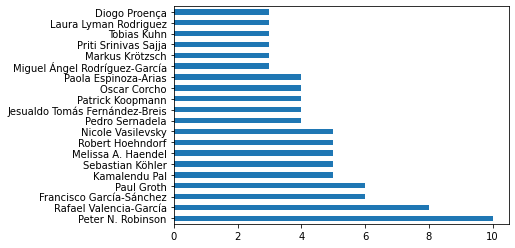

In [13]:
author_count.plot(kind="barh")

another to vizualize the years and the number of publications per years of our most represented author:

In [14]:
author_publications = author_publications["publication_year"].value_counts()
author_publications = author_publications.sort_index(ascending=True)
author_publications

2015    1
2017    1
2018    2
2019    2
2020    2
2021    2
Name: publication_year, dtype: int64

<AxesSubplot:>

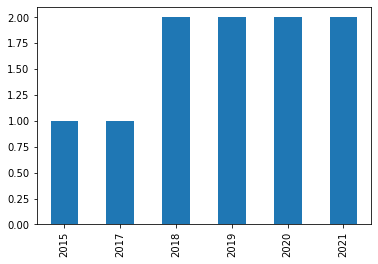

In [15]:
author_publications.plot(kind="bar")

let's also visualize the number of publications published each year in both our relationsl CSV and graph CSV:

In [16]:
publications_per_year = relational_publications["publication_year"].value_counts()
publications_per_year = publications_per_year.sort_index(ascending=True)
publications_per_year

2014      3
2015      1
2016     15
2017     24
2018     83
2019    109
2020     56
2021    209
Name: publication_year, dtype: int64

<AxesSubplot:>

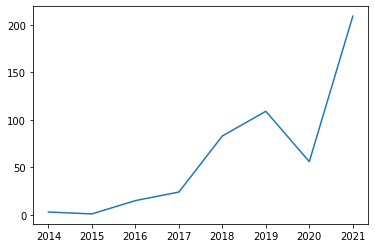

In [17]:
publications_per_year.plot()

In [18]:
publications_per_year = graph_publications["publication_year"].value_counts()
publications_per_year = publications_per_year.sort_index(ascending=True)
publications_per_year

2011      1
2013      1
2014     11
2015      9
2016     19
2017     36
2018     79
2019    103
2020    110
2021    124
2022      7
Name: publication_year, dtype: int64

<AxesSubplot:>

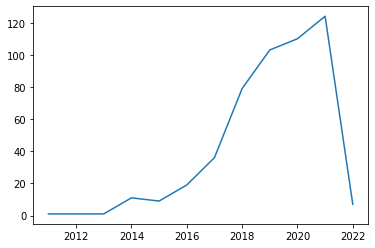

In [19]:
publications_per_year.plot()

Finally let's calculate the minimum and maximum year of publication in our dataset, along with the median:

In [20]:
print(graph_publications["publication_year"].min())
print(graph_publications["publication_year"].max())
print(graph_publications["publication_year"].median())


2011
2022
2019.0


In [21]:
print(relational_publications["publication_year"].min())
print(relational_publications["publication_year"].max())
print(relational_publications["publication_year"].median())

2014
2021
2020.0
